**<center><span style="font-family:serif; font-size:34px;"> Decoding Student Retention and Churn Predictive Analytics in the Telecommunication Service Sectors - A Case Study of Vodafone (Telecel) </span>
<a id = "missingvalue" ></a><center>**

<center><span style="font-family:Palatino; font-size:22px;"><i> Did you know that attracting a new customer costs <span style="color:#DC143C;">five times</span> as much as keeping an existing one? Pfeifer (2005)</i></span> </center>

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> Data Description </span>
<a id = "missingvalue" ></a>

- **Gender**: The students's gender.
- **College**: The specific college within the university.
- **Churn**: Indicates whether the student has stoped using the schoool sim ("Yes" or "No").
- **Level**: The academic level of the student.
- **Residence**: Whether the student lives on-campus or off-campus.
- **SIM_Usage**: Whether the student uses a vodafone sim card.
- **Usage_Freq**: Frequency of SIM usage.
- **Network_Strength**: Quality of the network (on a scale).
- **Voice_Calls**: Whether the student makes voice calls.
- **Mobile_Data_Internet**: Whether the student uses mobile data.
- **SMS_Text_Messaging**: Whether the student sends SMS texts.
- **Data_Exhaustion**: Whether the student experiences data exhaustion.
- **Other_Networks**: Whether the student uses other networks.
- **Poor_Network_Quality_Coverage**: Whether the student experiences poor network quality.
- **Insufficient_Data_Allowance**: Whether the student's data allowance is insufficient.
- **Unsatisfactory_Customer_Service**: Whether the student is dissatisfied with customer service.
- **High_Costs_Pricing**: Whether the student finds the pricing high.
- **Monthly_Data_Usage**: Amount of data used monthly.


***

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> Loading libraries and data</span>
<a id="loading"></a>

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import missingno as msno #for missing data
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px #for histogram


In [112]:
import random
import string
import pandas as pd
import math

# Define lists for different fields
genders = ['Male', 'Female']
colleges = ['College of Engineering', 'College of Humanities and Social Sciences', 'College of Agriculture and Natural Resources', 'College of Art and Built Environment', 'College of Science', 'College of Health Sciences']
churns = ['Yes', 'No']
levels = [100, 200, 300, 400, 500, 600]
residences = ['Off-campus', 'On-campus']
sim_usage = ['Yes', 'No']
usage_frequency = ['Daily', 'Several times a week', 'Occasionally', 'Rarely', 'Never']
network_strength = [1, 2, 3, 4, 5]
services_used = ['Voice Calls', 'Mobile data/Internet', 'SMS/Text messaging']
data_allowance_exhaustion = ['Yes', 'No']
other_networks = ['Yes', 'No']
considered_discontinuing = ['Yes', 'No']
reasons_for_discontinuing = ['Poor network quality/coverage', 'Insufficient data allowance', 'Unsatisfactory customer service', 'High costs/pricing']
education_levels = ['Undergraduate', 'Postgraduate', 'Distant Learning', 'Masters', 'PhD']

# Define a function to generate monthly data usage
def generate_monthly_data_usage():
    range_prob = random.random()
    if range_prob < 0.25:
        return round(random.uniform(0, 2), 2)
    elif range_prob < 0.5:
        return round(random.uniform(2, 4), 2)
    elif range_prob < 0.7:
        return round(random.uniform(4, 6), 2)
    elif range_prob < 0.85:
        return round(random.uniform(6, 8), 2)
    elif range_prob < 0.95:
        return round(random.uniform(8, 10), 2)
    else:
        return round(random.uniform(10, 15), 2)  # Assuming "more than 10" goes up to 15 GB

# Define a function to generate synthetic responses
def generate_responses(num_responses_per_college):
    responses = []
    for college in colleges:
        for _ in range(num_responses_per_college):
            gender = random.choices(genders, weights=[0.558, 0.442], k=1)[0]
            churn = random.choices(churns, weights=[0.83, 0.17], k=1)[0]
            education_level = random.choices(education_levels, weights=[0.98, 0.005, 0.005, 0.005, 0.005], k=1)[0]
            
            if education_level in ['Postgraduate', 'Distant Learning', 'Masters', 'PhD']:
                level = random.choice([100, 200])
            else:
                if college in ['College of Science', 'College of Engineering']:
                    level = random.choice(levels)  # All levels including 500 and 600
                else:
                    level = random.choice([100, 200, 300, 400])  # Only levels up to 400
            
            residence = random.choices(residences, weights=[0.675, 0.325], k=1)[0]
            sim_usage_value = random.choice(sim_usage)
            usage_frequency_value = random.choices(usage_frequency, weights=[0.481, 0.169, 0.208, 0.052, 0.091], k=1)[0]
            network_strength_value = random.choice(network_strength)
            voice_calls_value = random.choices(['Yes', 'No'], weights=[0.8, 0.2], k=1)[0]
            mobile_data_internet_value = random.choices(['Yes', 'No'], weights=[0.714, 0.286], k=1)[0]
            sms_text_messaging_value = random.choices(['Yes', 'No'], weights=[0.506, 0.494], k=1)[0]
            data_allowance_exhaustion_value = random.choice(data_allowance_exhaustion)
            other_networks_values = random.choices(other_networks, weights=[0.85, 0.15], k=1)[0]
            considered_discontinuing_value = random.choices(considered_discontinuing, weights=[0.95, 0.05], k=1)[0]

            poor_network_quality_coverage = 'Yes' if churn == 'Yes' else random.choices(['Yes', 'No'], weights=[0.701, 0.299], k=1)[0]
            insufficient_data_allowance = 'Yes' if churn == 'Yes' else random.choices(['Yes', 'No'], weights=[0.3, 0.7], k=1)[0]
            unsatisfactory_customer_service = 'Yes' if churn == 'Yes' else random.choices(['Yes', 'No'], weights=[0.61, 0.39], k=1)[0]
            high_costs_pricing = 'Yes' if churn == 'Yes' else random.choices(['Yes', 'No'], weights=[0.455, 0.545], k=1)[0]

            monthly_data_usage = generate_monthly_data_usage()
            responses.append([gender, college, churn, level, education_level, residence, sim_usage_value, usage_frequency_value, network_strength_value, voice_calls_value, mobile_data_internet_value, sms_text_messaging_value, data_allowance_exhaustion_value, other_networks_values, poor_network_quality_coverage, insufficient_data_allowance, unsatisfactory_customer_service, high_costs_pricing, monthly_data_usage])

    return responses

# Generate synthetic responses
num_responses_per_college = 128
responses = generate_responses(num_responses_per_college)

# Create a DataFrame from the synthetic responses
columns = ['Gender', 'College', 'Churn', 'Level', 'Education_Level', 'Residence', 'SIM_Usage', 'Usage_Freq', 'Network_Strength', 'Voice_Calls', 'Mobile_Data_Internet', 'SMS_Text_Messaging', 'Data_Exhaustion', 'Multiple_Networks', 'Poor_Network_Quality_Coverage', 'Insufficient_Data_Allowance', 'Unsatisfactory_Customer_Service', 'High_Costs_Pricing', 'Monthly_Data_Usage']

data = pd.DataFrame(responses, columns=columns)

# Display the first few rows of the DataFrame
# print(df.head())
# data['Level'] = data['Level'] / 100

data
# # Display some basic statistics
# print(df['College'].value_counts())
# print(df['Education_Level'].value_counts(normalize=True))
# print(df['Monthly_Data_Usage'].value_counts(normalize=True))

# Save the synthetic responses to a CSV file
data.to_csv('newData.csv', index=False)

In [113]:
# import random
# import string
# import pandas as pd
# import math

# # Define lists for different fields
# genders = ['Male', 'Female']
# colleges = ['College of Engineering', 'College of Humanities and Social Sciences', 'College of Agriculture and Natural Resources', 'College of Art and Built Environment', 'College of Science', 'College of Health Sciences']
# churns = ['Yes', 'No']
# levels = [100, 200, 300, 400, 500, 600]
# residences = ['Off-campus', 'On-campus']
# sim_usage = ['Yes', 'No']
# usage_frequency = ['Daily', 'Several times a week', 'Occasionally', 'Rarely', 'Never']
# network_strength = [1, 2, 3, 4, 5]
# services_used = ['Voice Calls', 'Mobile data/Internet', 'SMS/Text messaging']
# data_allowance_exhaustion = ['Yes', 'No']
# other_networks = ['Yes', 'No']
# considered_discontinuing = ['Yes', 'No']
# reasons_for_discontinuing = ['Poor network quality/coverage', 'Insufficient data allowance', 'Unsatisfactory customer service', 'High costs/pricing']
# education_levels = ['Undergraduate', 'Postgraduate', 'Distant Learning', 'Masters', 'PhD']

# # Define a function to generate monthly data usage
# def generate_monthly_data_usage():
#     range_prob = random.random()
#     if range_prob < 0.25:
#         return f"0-2"
#     elif range_prob < 0.5:
#         return f"2-4"
#     elif range_prob < 0.75:
#         return f"4-6"
#     elif range_prob < 0.9:
#         return f"6-8"
#     else:
#         return "10+"

# # Define a function to generate synthetic responses
# def generate_responses(num_responses_per_college):
#     responses = []
#     for college in colleges:
#         for _ in range(num_responses_per_college):
#             gender = random.choices(genders, weights=[0.558, 0.442], k=1)[0]
#             churn = random.choices(churns, weights=[0.83, 0.17], k=1)[0]
#             education_level = random.choices(education_levels, weights=[0.98, 0.005, 0.005, 0.005, 0.005], k=1)[0]
            
#             if education_level in ['Postgraduate', 'Distant Learning', 'Masters', 'PhD']:
#                 level = random.choice([100, 200])
#             else:
#                 if college in ['College of Science', 'College of Engineering']:
#                     level = random.choice(levels)  # All levels including 500 and 600
#                 else:
#                     level = random.choice([100, 200, 300, 400])  # Only levels up to 400
            
#             residence = random.choices(residences, weights=[0.675, 0.325], k=1)[0]
#             sim_usage_value = random.choice(sim_usage)
#             usage_frequency_value = random.choices(usage_frequency, weights=[0.481, 0.169, 0.208, 0.052, 0.091], k=1)[0]
#             network_strength_value = random.choice(network_strength)
#             voice_calls_value = random.choices(['Yes', 'No'], weights=[0.8, 0.2], k=1)[0]
#             mobile_data_internet_value = random.choices(['Yes', 'No'], weights=[0.714, 0.286], k=1)[0]
#             sms_text_messaging_value = random.choices(['Yes', 'No'], weights=[0.506, 0.494], k=1)[0]
#             data_allowance_exhaustion_value = random.choice(data_allowance_exhaustion)
#             other_networks_values = random.choices(other_networks, weights=[0.85, 0.15], k=1)[0]
#             considered_discontinuing_value = random.choices(considered_discontinuing, weights=[0.95, 0.05], k=1)[0]

#             poor_network_quality_coverage = 'Yes' if churn == 'Yes' else random.choices(['Yes', 'No'], weights=[0.701, 0.299], k=1)[0]
#             Better_services_from_other_network  = 'Yes' if churn == 'Yes' else random.choices(['Yes', 'No'], weights=[0.83, 0.17], k=1)[0]
#             unsatisfactory_customer_service = 'Yes' if churn == 'Yes' else random.choices(['Yes', 'No'], weights=[0.61, 0.39], k=1)[0]
#             high_costs_pricing = 'Yes' if churn == 'Yes' else random.choices(['Yes', 'No'], weights=[0.455, 0.545], k=1)[0]

#             monthly_data_usage = generate_monthly_data_usage()
#             responses.append([gender, college, churn, level, education_level, residence, sim_usage_value, usage_frequency_value, network_strength_value, voice_calls_value, mobile_data_internet_value, sms_text_messaging_value, data_allowance_exhaustion_value, other_networks_values, poor_network_quality_coverage, Better_services_from_other_network, unsatisfactory_customer_service, high_costs_pricing, monthly_data_usage])

#     return responses

# # Generate synthetic responses
# num_responses_per_college = 128
# responses = generate_responses(num_responses_per_college)

# # Create a DataFrame from the synthetic responses
# columns = ['Gender', 'College', 'Churn', 'Level', 'Education_Level', 'Residence', 'SIM_Usage', 'Usage_Freq', 'Network_Strength', 'Voice_Calls', 'Mobile_Data_Internet', 'SMS_Text_Messaging', 'Data_Exhaustion', 'Multiple_Networks', 'Poor_Network_Quality_Coverage', 'Better_services_from_other_network', 'Unsatisfactory_Customer_Service', 'High_Costs_Pricing', 'Monthly_Data_Usage']

# data = pd.DataFrame(responses, columns=columns)

# # Display the first few rows of the DataFrame
# # print(df.head())
# data['Level'] = data['Level'] / 100

# data
# # # Display some basic statistics
# # print(df['College'].value_counts())
# # print(df['Education_Level'].value_counts(normalize=True))
# # print(df['Monthly_Data_Usage'].value_counts(normalize=True))

# # Save the synthetic responses to a CSV file
# # df.to_csv('reData.csv', index=False)

In [114]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# !pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
# format to 3 dp
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [115]:
# data = pd.read_csv('../data/Churn of School Vodaphone.csv')
# data = pd.read_csv('Synthetic_School_Vodaphone_Data.csv')
data

# data = pd.read_csv('/content/drive/MyDrive/Research Paper Final year 4/Python Scripts/telecel/data/reData.csv')

,Gender,College,Churn,Level,Education_Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Multiple_Networks,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage
0,Male,College of Engineering,Yes,600,Undergraduate,Off-campus,Yes,Several times a week,2,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,1.160
1,Female,College of Engineering,Yes,100,Undergraduate,Off-campus,No,Several times a week,3,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,5.400
2,Female,College of Engineering,Yes,200,Undergraduate,On-campus,Yes,Daily,5,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,5.060
3,Female,College of Engineering,No,100,Undergraduate,On-campus,No,Daily,5,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3.560
4,Male,College of Engineering,Yes,100,Undergraduate,Off-campus,Yes,Daily,3,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,4.530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Male,College of Health Sciences,Yes,200,Undergraduate,Off-campus,Yes,Daily,2,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,0.870
764,Male,College of Health Sciences,Yes,400,Undergraduate,Off-campus,Yes,Occasionally,4,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,5.760
765,Male,College of Health Sciences,Yes,400,Undergraduate,Off-campus,No,Occasionally,3,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,7.770
766,Male,College of Health Sciences,Yes,400,Undergraduate,On-campus,No,Never,5,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,9.220


In [116]:
data.columns


Index(['Gender', 'College', 'Churn', 'Level', 'Education_Level', 'Residence',
       'SIM_Usage', 'Usage_Freq', 'Network_Strength', 'Voice_Calls',
       'Mobile_Data_Internet', 'SMS_Text_Messaging', 'Data_Exhaustion',
       'Multiple_Networks', 'Poor_Network_Quality_Coverage',
       'Insufficient_Data_Allowance', 'Unsatisfactory_Customer_Service',
       'High_Costs_Pricing', 'Monthly_Data_Usage'],
      dtype='object')

In [117]:
# Drop the first and last columns
data.drop(data.columns[[0, -1]], axis=1, inplace=True)
data.head()
old_columns=data.columns
old_columns

# # New columns
# new_columns = ["Gender", "College", "Year", "Residence","Education Level","Churn", "Usage_Freq", "Network_Strength", 
#                "Voice_Calls", "Mobile_Data_Internet", "SMS_Text_Messaging","Multiple_Networks", 
#                "Poor_Network_Quality_Coverage", "Unsatisfactory_Customer_Service", "Competitive_Offers",
#                "High_Costs_Pricing", "Data_Exhaustion","Monthly_Data_Usage"]

# Create a dictionary to map old column names to new column names
# column_mapping = dict(zip(old_columns, new_columns))
# Drop rows where "Education Level" is not equal to "undergraduate"
data = data[data['Education_Level'] == 'Undergraduate']

#drop the Education Level
data = data.drop('Education_Level',axis=1)

# Rename the columns
# data.rename(columns=column_mapping, inplace=True)

In [118]:
data.head()

,College,Churn,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Multiple_Networks,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing
0,College of Engineering,Yes,600,Off-campus,Yes,Several times a week,2,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
1,College of Engineering,Yes,100,Off-campus,No,Several times a week,3,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
2,College of Engineering,Yes,200,On-campus,Yes,Daily,5,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
3,College of Engineering,No,100,On-campus,No,Daily,5,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
4,College of Engineering,Yes,100,Off-campus,Yes,Daily,3,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes


>**The data set includes information about:**


* **Demographic info about students** – gender,educational level,program level, college, and place of residence
* **Students account information** - how long they’ve been using the sim card(level) and their usage
* **Students who no longer use their sim** – the column is used to detrmine Churn
* **Services that each student uses** – voice call, mobile data and sms texting
* **Factors influence discountinuation** – multiple networks, network coverage, customer service, data allowance, high cost of services
* **Data Activity**  - data usage, exhaust monthly data

***

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> Undertanding the data</span>
<a id = "Undertanding the data" ></a>

In [119]:
data.shape

(749, 16)

- There are 31 rows and 18 columns in the datasset

In [120]:
data.info()
#For further descriptive anlaysis

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   College                          749 non-null    object
 1   Churn                            749 non-null    object
 2   Level                            749 non-null    int64 
 3   Residence                        749 non-null    object
 4   SIM_Usage                        749 non-null    object
 5   Usage_Freq                       749 non-null    object
 6   Network_Strength                 749 non-null    int64 
 7   Voice_Calls                      749 non-null    object
 8   Mobile_Data_Internet             749 non-null    object
 9   SMS_Text_Messaging               749 non-null    object
 10  Data_Exhaustion                  749 non-null    object
 11  Multiple_Networks                749 non-null    object
 12  Poor_Network_Quality_Coverage    749 non-

In [121]:
data.describe()
#only check for numerival stuff

,Level,Network_Strength
count,749.000,749.000
mean,285.047,3.003
std,142.234,1.369
min,100.000,1.000
25%,200.000,2.000
50%,300.000,3.000
75%,400.000,4.000
max,600.000,5.000


***

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> Checking missing values </span>
<a id = "missingvalue" ></a>

In [122]:
data.isnull().sum()

College                            0
Churn                              0
Level                              0
Residence                          0
SIM_Usage                          0
Usage_Freq                         0
Network_Strength                   0
Voice_Calls                        0
Mobile_Data_Internet               0
SMS_Text_Messaging                 0
Data_Exhaustion                    0
Multiple_Networks                  0
Poor_Network_Quality_Coverage      0
Insufficient_Data_Allowance        0
Unsatisfactory_Customer_Service    0
High_Costs_Pricing                 0
dtype: int64

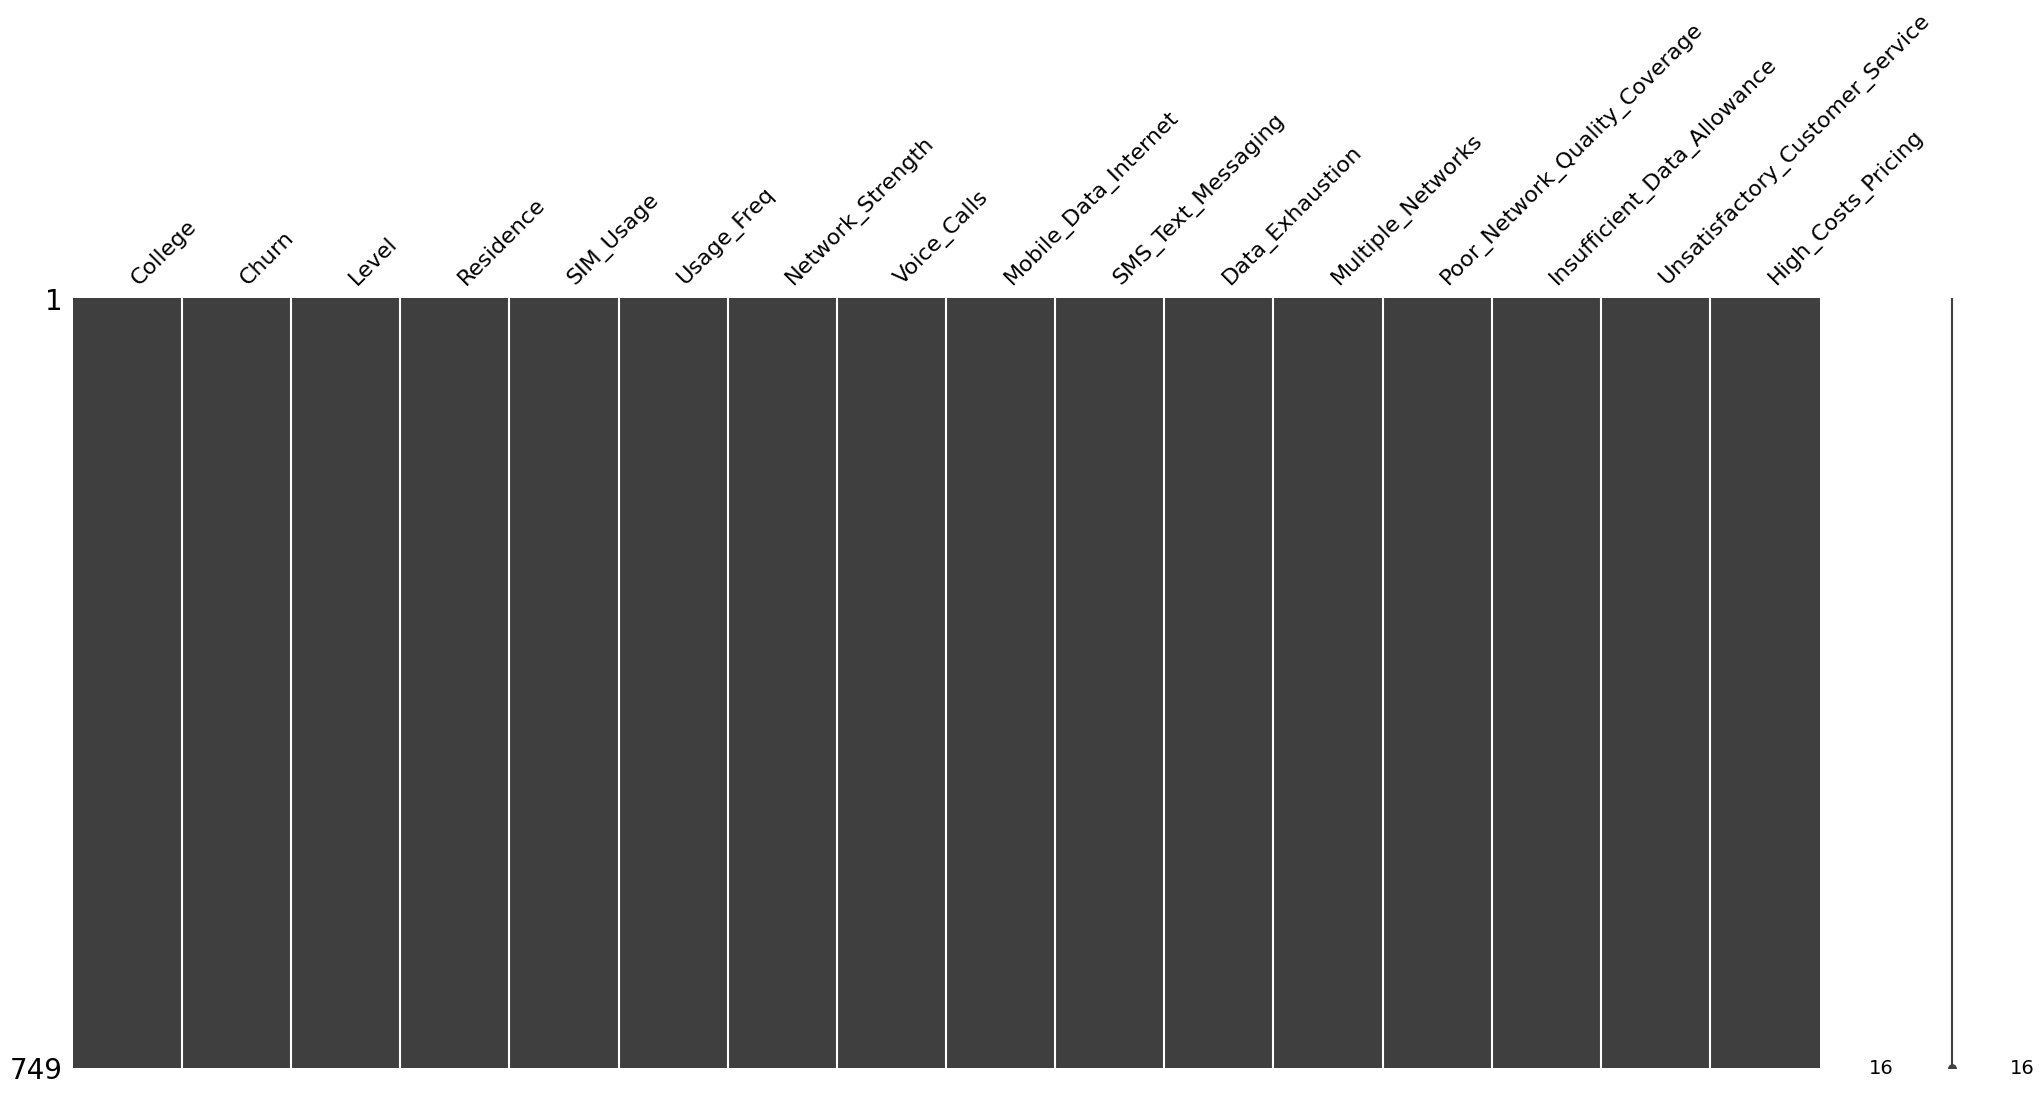

In [123]:
# Visualize missing values as a matrix
msno.matrix(data);

> Using this matrix we can very quickly find the pattern of missingness in the dataset.
* From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

***

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> Data Manipulation </span>
<a id = "8" ></a>

In [124]:

#drop t
college_mapping = {
    'College of Agriculture and Natural Resources': 'CANARSA',
    'College of Science': 'COS',
    'College of Engineering': 'COE',
    'College of Art and Built Environment': 'CABE',
    'College of Humanities and Social Science': 'COHSS',
    'College of Health Sciences': 'COH'

}

data['College'] = data['College'].replace(college_mapping, regex=True)

>Shorten the colleges names to abbreviations

***

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> Data Visualization </span>
<a id = "8" ></a>

In [125]:
# g_labels = ['Male', 'Female']
# c_labels = ['No', 'Yes']
# # Create subplots: use 'domain' type for Pie subplot
# fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
# fig.add_trace(go.Pie(labels=g_labels, values=data['Gender'].value_counts(), name="Gender"),
#               1, 1)
# fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),
#               1, 2)

# # Use `hole` to create a donut-like pie chart
# fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

# fig.update_layout(
#     title_text="Gender and Churn Distributions of Students",
#     # Add annotations in the center of the donut pies.
#     annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
#                  dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
# fig.show()

In [126]:
# # Count the number of 'No Churn' and 'Churn' cases for each gender
# no_churn = data["Churn"][data["Churn"] == "No"].groupby(by=data["Gender"]).count().reset_index()
# yes_churn = data["Churn"][data["Churn"] == "Yes"].groupby(by=data["Gender"]).count().reset_index()

# # Rename columns
# no_churn.columns = ["Gender", "No Churn"]
# yes_churn.columns = ["Gender", "Churn"]

# # Merge the two DataFrames
# churn_table = pd.merge(no_churn, yes_churn, on="Gender", how="outer")

# # Calculate the total
# churn_table["Total"] = churn_table["No Churn"] + churn_table["Churn"]
# churn_table


In [127]:
# plt.figure(figsize=(6, 6))
# labels =["Churn: No","Churn:Yes"]
# values = [522,246]
# labels_gender = ["F","M","F","M"]
# sizes_gender = [281,241 , 122,124]
# colors = ['#ff6666', '#66b3ff']
# colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
# explode = (0.3,0.3) 
# explode_gender = (0.1,0.1,0.1,0.1)
# textprops = {"fontsize":15}
# #Plot
# plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
# plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
# #Draw circle
# centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

# plt.title('Churn Distribution with Gender: Male(M) and Female(F)', fontsize=15, y=1.1)

# # show plot 

# plt.axis('equal')
# plt.tight_layout()
# plt.show()

# pd.crosstab(data["Churn"], data["Gender"], margins=True)


>There is negligible difference in customer percentage who chanaged or terminated their vodafone service. Both genders behaved in similar fashion when it comes to migrating to another service provider or stop using the vodafone.

In [128]:
fig = px.histogram(data, x="Churn", color="College", barmode="group", title="<b>College Churn distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Distribution By Colleges**

- College of Agriculture and Natural Resources: CANARSA
- College of Science: COS  
- College of Engineering: COE  
- College of Art and Built Environment: CABE  
- College of Humanities and Social Science: COHSS  
- College of Health Sciences: COH
> COS and CABE tend to have very high churn rates

In [129]:
# # Boxplot

# # Calculate the count of levels for each College
# level_counts = data.groupby(['College', 'Level']).size().reset_index(name='Count')

# # Create the grouped box plot
# fig = px.box(data, x="College", y="Level", color="College", title="<b>College Churn Distribution</b>")

# # Add annotations for level counts
# for college, level, count in zip(level_counts['College'], level_counts['Level'], level_counts['Count']):
#     fig.add_annotation(
#         x=college,
#         y=level,
#         text=str(count),
#         showarrow=False,
#         font=dict(size=12, color='black')
#     )
# # Customize layout
# fig.update_layout(width=700, height=500)
# # Show the plot
# fig.show()

# # Histogram
# # fig = px.histogram(data, x="College", color="Level", barmode="group", title="<b>College Churn distribution<b>")
# # fig.update_layout(width=700, height=500, bargap=0.1)
# # fig.show()

# # Violin
# # fig = px.violin(data, x="College", y="Level", box=True, points="all", title="<b>College Churn distribution<b>")
# # fig.update_layout(width=700, height=500)
# # fig.show()


In [130]:
data

,College,Churn,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Multiple_Networks,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing
0,COE,Yes,600,Off-campus,Yes,Several times a week,2,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
1,COE,Yes,100,Off-campus,No,Several times a week,3,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
2,COE,Yes,200,On-campus,Yes,Daily,5,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
3,COE,No,100,On-campus,No,Daily,5,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
4,COE,Yes,100,Off-campus,Yes,Daily,3,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,COH,Yes,200,Off-campus,Yes,Daily,2,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes
764,COH,Yes,400,Off-campus,Yes,Occasionally,4,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes
765,COH,Yes,400,Off-campus,No,Occasionally,3,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
766,COH,Yes,400,On-campus,No,Never,5,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes


In [131]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="Residence",  title="<b>Churn distribution by Residence</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [132]:
import plotly.graph_objects as go

labels = data['Usage_Freq'].unique()
values = data['Usage_Freq'].value_counts()

# Define explode values; set non-zero values for the slices you want to explode
explode = [0.1 if label in ['Rarely', 'Daily'] else 0 for label in labels]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value',
                             hole=.5, pull=explode,
                             textposition='outside')])

fig.update_layout(title_text="<b>Usage Frequency Distribution</b>")

fig.show()


In [133]:
fig = px.histogram(data, x="Churn", color="Usage_Freq", title="<b>Usage Frequency Distribution with Churn included </b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [134]:
labels = data['Multiple_Networks'].unique()
values = data['Multiple_Networks'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent+value')])

fig.update_layout(title_text="<b>Multiple Network Distribution</b>")

fig.show()


In [135]:
fig = go.Figure(data=[go.Bar(x=data['Network_Strength'].value_counts().index,
                             y=data['Network_Strength'].value_counts().values,
                             marker=dict(color=px.colors.sequential.Plasma))])

fig.update_layout(title_text="<b> Network_Strength Distribution</b>",
                  xaxis_title="Network Strength",
                  yaxis_title="Count")

fig.show()



Churn Distribution w.r.t. Voice Calls, Mobile Data Internet, and SMS Text Messaging

In [136]:

# Create a list of unique values in the 'Churn' column
churn_values = ['Yes', 'No']
voice = data['Voice_Calls'].value_counts()
mobile_data = data['Mobile_Data_Internet'].value_counts()
SMS_messaging = data['SMS_Text_Messaging'].value_counts()
fig = go.Figure()

# Voice Calls
fig.add_trace(go.Bar(    
    x=churn_values,
    y=voice,
    name='Voice Calls'
))

# Mobile Data Internet
fig.add_trace(go.Bar(
    x=churn_values,
    y=mobile_data,
    name='Mobile Data Internet'
))

# SMS Text Messaging
fig.add_trace(go.Bar(
    x=churn_values,
    y=SMS_messaging,
    name='SMS Text Messaging'
))

fig.update_layout(title_text="<b>Churn Distribution by Services</b>")

fig.show()
# data['SMS_Text_Messaging'].value_counts()
# fig = go.Figure()

# fig.add_trace(go.Bar(
#   x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
#        ["Female", "Male", "Female", "Male"]],
#   y = [965, 992, 219, 240],
#   name = 'DSL',
# ))

# fig.add_trace(go.Bar(
#   x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
#        ["Female", "Male", "Female", "Male"]],
#   y = [889, 910, 664, 633],
#   name = 'Fiber optic',
# ))

# fig.add_trace(go.Bar(
#   x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
#        ["Female", "Male", "Female", "Male"]],
#   y = [690, 717, 56, 57],
#   name = 'No Internet',
# ))

# fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

# fig.show()

In [137]:
# combined_df = pd.concat([data['Gender'],data['Voice_Calls'], data['Mobile_Data_Internet'], data['SMS_Text_Messaging']], axis=1)
# a=combined_df[combined_df["Gender"]=="Male"][["Voice_Calls"]].value_counts()
# b=combined_df[combined_df["Gender"]=="Male"][["Mobile_Data_Internet"]].value_counts()
# c=combined_df[combined_df["Gender"]=="Male"][["SMS_Text_Messaging"]].value_counts()
# combined_value_counts = pd.DataFrame({'Voice_Calls': a, 'Mobile_Data_Internet': b, 'SMS_Text_Messaging': c})
# combined_value_counts['Total'] = combined_value_counts.sum(axis=1)
# combined_value_counts


In [138]:
# combined_df = pd.concat([data['Gender'],data['Voice_Calls'], data['Mobile_Data_Internet'], data['SMS_Text_Messaging']], axis=1)
# a=combined_df[combined_df["Gender"]=="Female"][["Voice_Calls"]].value_counts()
# b=combined_df[combined_df["Gender"]=="Female"][["Mobile_Data_Internet"]].value_counts()
# c=combined_df[combined_df["Gender"]=="Female"][["SMS_Text_Messaging"]].value_counts()
# combined_value_counts = pd.DataFrame({'Voice_Calls': a, 'Mobile_Data_Internet': b, 'SMS_Text_Messaging': c})
# combined_value_counts['Total'] = combined_value_counts.sum(axis=1)
# combined_value_counts


In [139]:
fig = go.Figure()

# Poor_Network_Quality_Coverage
fig.add_trace(go.Bar(
  x = ['Churn:No', 'Churn:Yes'],
  y = data[data['Voice_Calls'] == 'Yes']['Churn'].value_counts().tolist(),
  name = 'Poor_Network_Quality_Coverage',
))

# Insufficient_Data_Allowance
fig.add_trace(go.Bar(
  x = ['Churn:No', 'Churn:Yes'],
  y = data[data['Mobile_Data_Internet'] == 'Yes']['Churn'].value_counts().tolist(),
  name = 'Mobile Data Internet',
))

# Unsatisfactory_Customer_Service
fig.add_trace(go.Bar(
  x = ['Churn:No', 'Churn:Yes'],
  y = data[data['SMS_Text_Messaging'] == 'Yes']['Churn'].value_counts().tolist(),
  name = 'Unsatisfactory_Customer_Service',
))
# High_Costs_Pricing
fig.add_trace(go.Bar(
  x = ['Churn:No', 'Churn:Yes'],
  y = data[data['SMS_Text_Messaging'] == 'Yes']['Churn'].value_counts().tolist(),
  name = 'High_Costs_Pricing',
))


fig.update_layout(title_text="<b>Churn Distribution by Discountinuation Factors</b>")

fig.show()


In [140]:
import plotly.express as px

fig = px.violin(data, x='Churn', y='Level', box=True)

# Update yaxis properties
fig.update_yaxes(title_text='Level (Year)', row=1, col=1)

# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
                  title_font=dict(size=25, family='Courier'),
                  title='<b>Level(Year) vs Churn</b>')

fig.show()

* The shapes of the two violins are quite similar, suggesting that the overall distribution of "Level" is comparable for both categories of "Churn".
* The median "Level" (the thick horizontal line inside the box) appears to be slightly higher for the "Yes" category compared to the "NO" category.
* The interquartile ranges (the boxes) and the whiskers (extending to the minimum and maximum values) also seem to be relatively similar for both categories, indicating that the spread and range of "Level" values are Yest vastly different.

**Distribution of Monthly_Data_Usage by Data_Exhaustion**

In [141]:
# ax = sns.kdeplot(data.Monthly_Data_Usage[(data["Data_Exhaustion"] == 'No') ],
#                 color="Gold", fill = True);
# ax = sns.kdeplot(data.Monthly_Data_Usage[(data["Data_Exhaustion"] == 'Yes') ],
#                 ax =ax, color="Green", fill= True);
# ax.legend(["Not Data_Exhaustion","Data_Exhaustion"],loc='upper right');
# ax.set_ylabel('Density');
# ax.set_xlabel('Monthly_Data_Usage');
# ax.set_title('Distribution of Monthly_Data_Usage by Data_Exhaustion');
# data['Monthly_Data_Usage'] = data['Monthly_Data_Usage'].replace('Almost 70GB', 'More than 8')


# correct
# fig = px.histogram(data, x="Data_Exhaustion", color="Monthly_Data_Usage", title="<b>Distribution of monthly charges by Data Exhaustion </b>")
# fig.update_layout(width=700, height=500, bargap=0.1)
# fig.show()

* Data_Exhaustion (Green): Peaks at a value of 2 on the Monthly_Data_Usage axis, indicating that users experiencing data exhaustion tend to use around this amount of data before their data runs out.
* Not Data_Exhaustion (Yellow): Has a peak slightly to the right of the Data_Exhaustion peak, suggesting that users who do not churn generally consume more data.

In [142]:
# sns.set_context("paper",font_scale=1.1)
# ax = sns.kdeplot(data.Monthly_Data_Usage[(data["Churn"] == 'No') ],
#                 color="Red", fill = True);
# ax = sns.kdeplot(data.Monthly_Data_Usage[(data["Churn"] == 'Yes') ],
#                 ax =ax, color="Blue", fill= True);
# ax.legend(["Not Churn","Churn"],loc='upper right');
# ax.set_ylabel('Density');
# ax.set_xlabel('Monthly_Data_Usage');
# ax.set_title('Distribution of monthly charges by churn');



# fig = px.histogram(data, x="Churn", color="Monthly_Data_Usage", title="<b>Distribution of monthly charges by churn </b>")
# fig.update_layout(width=700, height=500, bargap=0.1)
# fig.show()

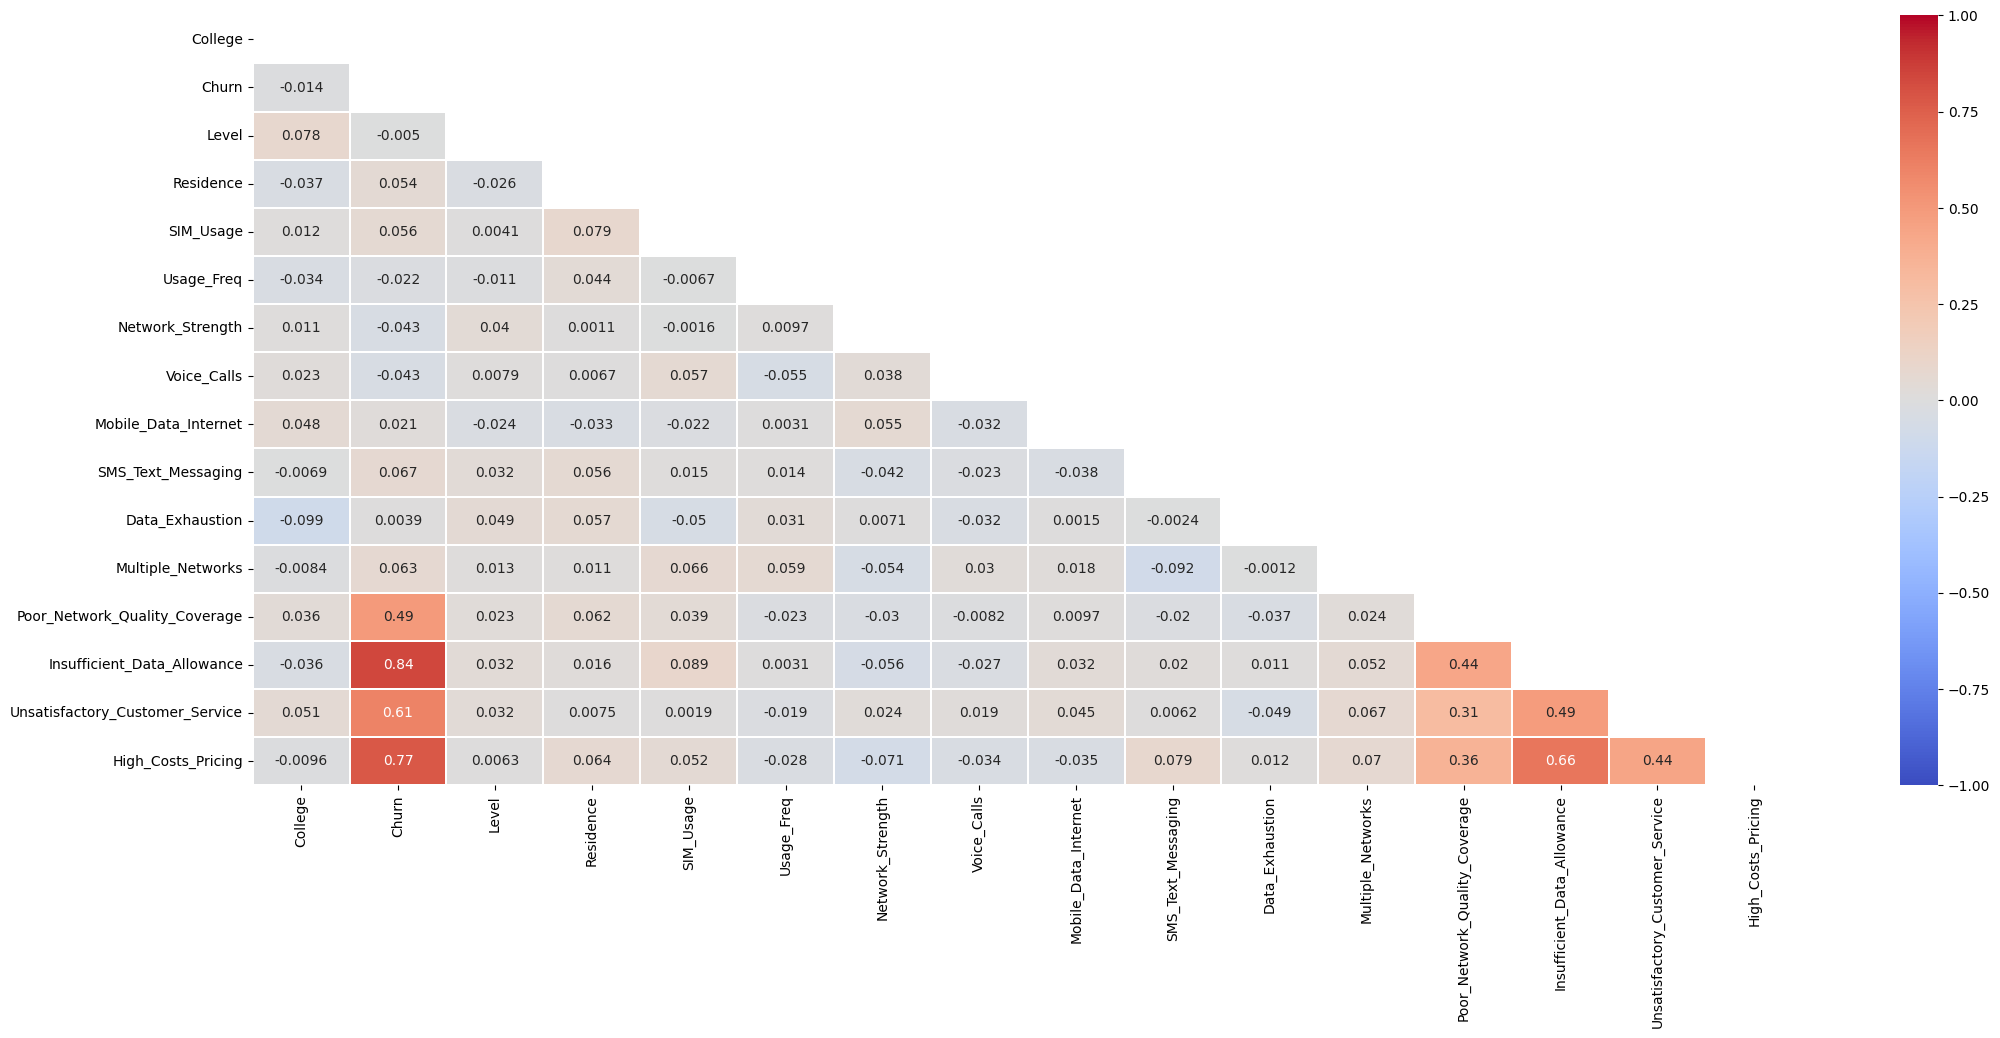

In [143]:
plt.figure(figsize=(25, 10))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
# sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')


***

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;">Model Preprocessing</span>
<a id = Model Preprocessing ></a>

In [144]:
# Create a DataFrame to store the encoded values
encoded_values = pd.DataFrame(columns=['Feature', 'Category', 'Encoded Value'])
# Get all the categorical columns
category_feature = data.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each categorical feature
for feature in category_feature:
    # Fit the LabelEncoder on the current feature and transform the data
    data[feature] = le.fit_transform(data[feature])

    # Get the encoded values for the current feature
    for category, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        # Create a temporary DataFrame to hold the current row
        temp_df = pd.DataFrame([{'Feature': feature, 'Category': category, 'Encoded Value': encoded_value}])

        # Append the temporary DataFrame to the main DataFrame
        encoded_values = pd.concat([encoded_values, temp_df], ignore_index=True)


In [145]:
# Display the encoded values
encoded_values

,Feature,Category,Encoded Value
0,College,CABE,0
1,College,CANARSA,1
2,College,COE,2
3,College,COH,3
4,College,COHSSs,4
5,College,COS,5
6,Churn,No,0
7,Churn,Yes,1
8,Residence,Off-campus,0
9,Residence,On-campus,1


In [146]:
# Now your data is ready for machine learning algorithms
# data['Level'] = data['Level'] / 100
data.head()

,College,Churn,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Multiple_Networks,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing
0,2,1,600,0,1,4,2,1,1,0,1,1,1,1,1,1
1,2,1,100,0,0,4,3,1,1,0,0,1,1,1,1,1
2,2,1,200,1,1,0,5,1,1,0,0,1,1,1,1,1
3,2,0,100,1,0,0,5,1,1,1,1,1,1,0,1,1
4,2,1,100,0,1,0,3,1,1,0,0,1,1,1,1,1


In [147]:
# Splitting the data into training and test sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing completed!")

Data preprocessing completed!


In [148]:
plt.figure(figsize=(14,7))
data.corr()['Churn'].sort_values(ascending = False)

Churn                              1.000
Insufficient_Data_Allowance        0.843
High_Costs_Pricing                 0.774
Unsatisfactory_Customer_Service    0.607
Poor_Network_Quality_Coverage      0.493
Multiple_Networks                  0.063
SIM_Usage                          0.056
Network_Strength                   0.042
Usage_Freq                         0.039
Level                              0.021
Mobile_Data_Internet               0.021
Data_Exhaustion                    0.004
College                           -0.012
Voice_Calls                       -0.043
Residence                         -0.054
SMS_Text_Messaging                -0.067
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [149]:
# def distplot(feature, frame, color='r'):
#     # plt.figure(figsize=(8,3))
#     plt.title("Distribution for {}".format(feature))
#     ax = sns.distplot(frame[feature], color= color)

In [150]:
# num_cols = [ 'Network_Strength', 'Monthly_Data_Usage']
# for feat in num_cols: distplot(feat, data)

***

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> Machine Learning Model Evaluations and Predictions</span>
<a id = "modelprediction" ></a>

In [151]:
# Initialize the models
lr = LogisticRegression(random_state=42, solver='liblinear')
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
nn = MLPClassifier(random_state=42, max_iter=1000)
lgbm = LGBMClassifier(random_state=42)
# lightgbm.basic.Booster.silent = True

# List of models
models = [lr,rf,knn, svm, gb, nn, lgbm]
# Define the hyperparameters for each model``
hyperparameters = {
    'LogisticRegression': {
        'C': uniform(0.1, 10),
        'penalty': ['l1', 'l2']
    },
    'RandomForestClassifier': {
        'n_estimators': randint(50, 200),
       'max_depth': randint(1, 10)
    },
    'KNeighborsClassifier': {
        'n_neighbors': randint(1, 10)
    },
    'SVC': {
        'C': uniform(0.1, 10),
        'gamma': uniform(0.001, 1)
    },
    'GradientBoostingClassifier': {
        'n_estimators': randint(50, 200),
       'max_depth': randint(1, 10),
        'learning_rate': uniform(0.01, 0.3)
    },
    'MLPClassifier': {
        'hidden_layer_sizes': (randint(10, 100).rvs(), randint(10, 100).rvs()),
        'alpha': uniform(0.0001, 0.1)
    },
    'LGBMClassifier': {
        'n_estimators': randint(50, 200),
       'max_depth': randint(1, 10),
        'learning_rate': uniform(0.01, 0.3)
    }
}


> Logistic Regression (LR):

Simple and Interpretable: It is easy to implement and interpret, making it useful for understanding the impact of each feature.
Binary Classification: Well-suited for binary classification problems like churn prediction.
Random Forest Classifier (RF):

Ensemble Method: Combines multiple decision trees to improve accuracy and reduce overfitting.
Handles Non-linear Data: Can capture complex interactions between features.
> K-Nearest Neighbors (KNN):

Instance-based Learning: Makes predictions based on the closest training examples, which can be useful for datasets where the decision boundary is not linear.
Non-parametric: Does not make strong assumptions about the form of the mapping function.
Support Vector Classifier (SVC):

Effective in High-dimensional Spaces: Works well when the number of dimensions is greater than the number of samples.
Margin Maximization: Finds a hyperplane that best separates the classes with a maximum margin.
> Gradient Boosting Classifier (GB):

Boosting Method: Builds models sequentially, each correcting the errors of the previous ones.
Flexibility: Can handle various types of data and is robust to overfitting.
> Multi-layer Perceptron Classifier (MLP):

Neural Network: Can model complex relationships and interactions between features.
Non-linear Activation: Capable of capturing non-linear patterns in the data.
> LightGBM Classifier (LGBM):

Gradient Boosting Framework: Efficient and scalable, particularly good for large datasets.
Faster Training: Optimized for speed and memory usage, making it suitable for large-scale data.

In [152]:
import lightgbm

# Perform a randomized search for each model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nTuning {model_name}...")

    # Initialize a RandomizedSearchCV object
    rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)

    # Fit the RandomizedSearchCV object to the data
    rs.fit(X_train, y_train)

    # Print the best parameters and the best score
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best score: {rs.best_score_}")

    # Make predictions on the test set
    y_pred = rs.best_estimator_.predict(X_test)

    # Print the confusion matrix
    print(f"Confusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Tuning LogisticRegression...
Best parameters: {'C': 6.086584841970366, 'penalty': 'l1'}
Best score: 0.9866666666666667
Confusion matrix for LogisticRegression:
[[ 19   0]
 [  0 131]]



Tuning RandomForestClassifier...
Best parameters: {'max_depth': 7, 'n_estimators': 171}
Best score: 0.99
Confusion matrix for RandomForestClassifier:
[[ 18   1]
 [  0 131]]



Tuning KNeighborsClassifier...
Best parameters: {'n_neighbors': 3}
Best score: 0.8547899159663868
Confusion matrix for KNeighborsClassifier:
[[  3  16]
 [  1 130]]



Tuning SVC...
Best parameters: {'C': 1.6601864044243653, 'gamma': 0.15699452033620265}
Best score: 0.9015126050420168
Confusion matrix for SVC:
[[ 10   9]
 [  1 130]]



Tuning GradientBoostingClassifier...
Best parameters: {'learning_rate': 0.12236203565420874, 'max_depth': 8, 'n_estimators': 70}
Best score: 0.99
Confusion matrix for GradientBoostingClassifier:
[[ 19   0]
 [  0 131]]



Tuning MLPClassifier...
Best parameters: {'alpha': 0.037554011884736255, 'hidde

In [153]:
# confusion matrix for each model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nTuning {model_name}...")

    # Initialize a RandomizedSearchCV object
    rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)

    # Fit the RandomizedSearchCV object to the data
    rs.fit(X_train, y_train)

    # Print the best parameters and the best score
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best score: {rs.best_score_}")

    # Make predictions on the test set
    y_pred = rs.best_estimator_.predict(X_test)

    # Print the confusion matrix
    print(f"Confusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

    # Print the classification report
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")


Tuning LogisticRegression...
Best parameters: {'C': 6.086584841970366, 'penalty': 'l1'}
Best score: 0.9866666666666667
Confusion matrix for LogisticRegression:
[[ 19   0]
 [  0 131]]


Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00       131

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150




Tuning RandomForestClassifier...
Best parameters: {'max_depth': 7, 'n_estimators': 171}
Best score: 0.99
Confusion matrix for RandomForestClassifier:
[[ 18   1]
 [  0 131]]


Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.99      1.00      1.00       131

    accuracy                           0.99      

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 505, number of negative: 94
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.843072 -> initscore=1.681264
[LightGBM] [Info] Start training from score 1.681264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with


Tuning LogisticRegression...
Best parameters: {'C': 6.086584841970366, 'penalty': 'l1'}
Best score: 0.9866666666666667
Confusion matrix for LogisticRegression:
[[ 19   0]
 [  0 131]]


Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00       131

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150





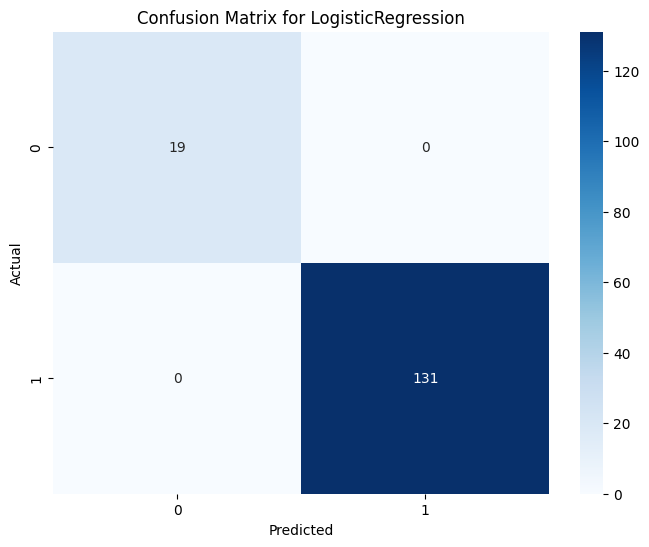


Tuning RandomForestClassifier...
Best parameters: {'max_depth': 7, 'n_estimators': 171}
Best score: 0.99
Confusion matrix for RandomForestClassifier:
[[ 18   1]
 [  0 131]]


Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.99      1.00      1.00       131

    accuracy                           0.99       150
   macro avg       1.00      0.97      0.98       150
weighted avg       0.99      0.99      0.99       150





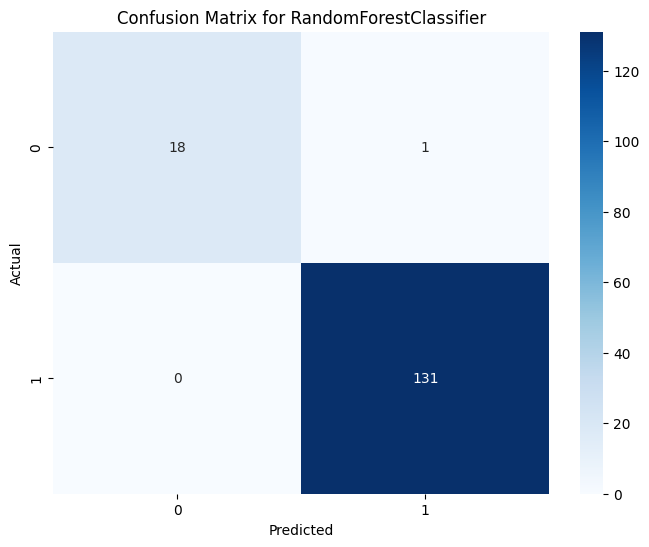


Tuning KNeighborsClassifier...
Best parameters: {'n_neighbors': 3}
Best score: 0.8547899159663868
Confusion matrix for KNeighborsClassifier:
[[  3  16]
 [  1 130]]


Classification report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.75      0.16      0.26        19
           1       0.89      0.99      0.94       131

    accuracy                           0.89       150
   macro avg       0.82      0.58      0.60       150
weighted avg       0.87      0.89      0.85       150





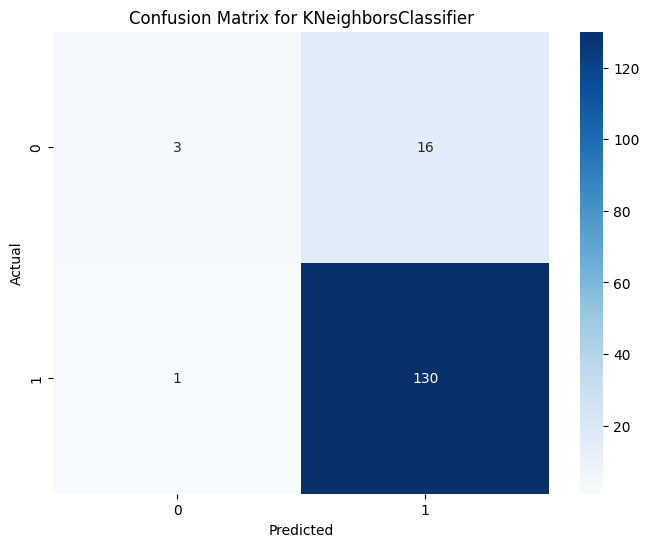


Tuning SVC...
Best parameters: {'C': 1.6601864044243653, 'gamma': 0.15699452033620265}
Best score: 0.9015126050420168
Confusion matrix for SVC:
[[ 10   9]
 [  1 130]]


Classification report for SVC:
              precision    recall  f1-score   support

           0       0.91      0.53      0.67        19
           1       0.94      0.99      0.96       131

    accuracy                           0.93       150
   macro avg       0.92      0.76      0.81       150
weighted avg       0.93      0.93      0.93       150





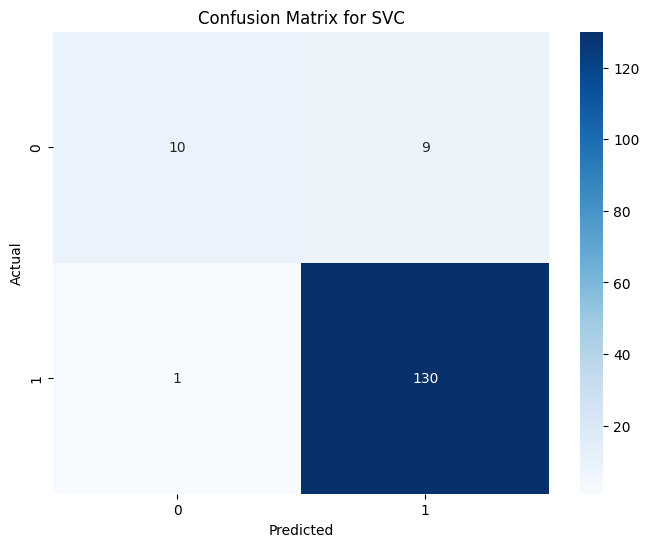


Tuning GradientBoostingClassifier...
Best parameters: {'learning_rate': 0.12236203565420874, 'max_depth': 8, 'n_estimators': 70}
Best score: 0.99
Confusion matrix for GradientBoostingClassifier:
[[ 19   0]
 [  0 131]]


Classification report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00       131

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150





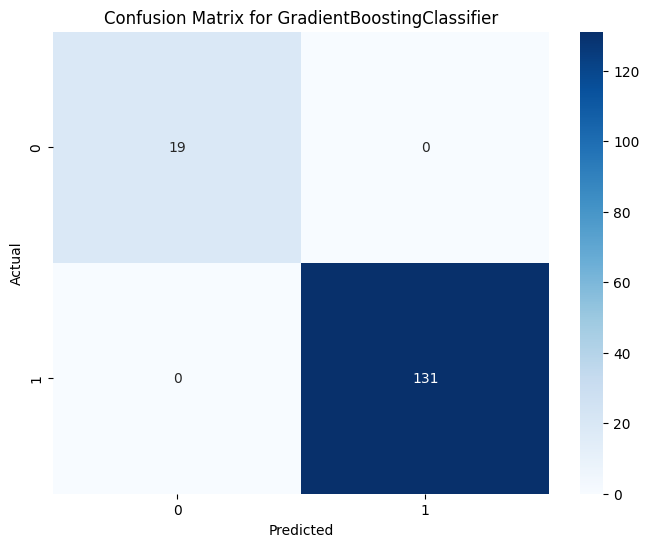


Tuning MLPClassifier...
Best parameters: {'alpha': 0.037554011884736255, 'hidden_layer_sizes': 40}
Best score: 0.8430812324929973
Confusion matrix for MLPClassifier:
[[  0  19]
 [  0 131]]


Classification report for MLPClassifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.87      1.00      0.93       131

    accuracy                           0.87       150
   macro avg       0.44      0.50      0.47       150
weighted avg       0.76      0.87      0.81       150





d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



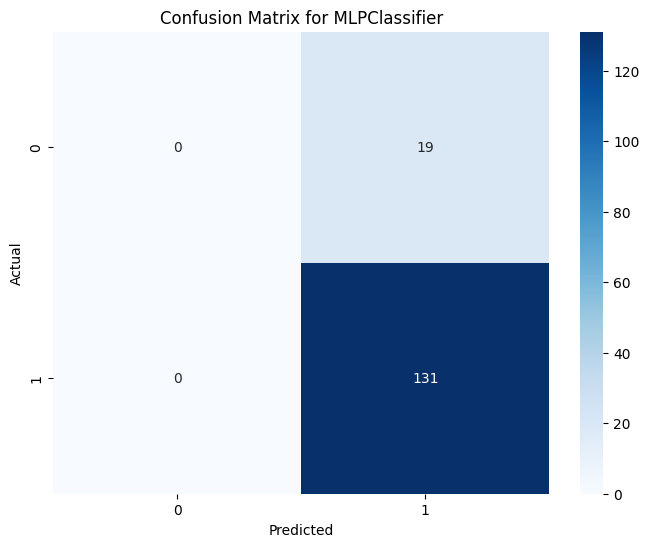


Tuning LGBMClassifier...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 505, number of negative: 94
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.843072 -> initscore=1.681264
[LightGBM] [Info] Start training from score 1.681264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

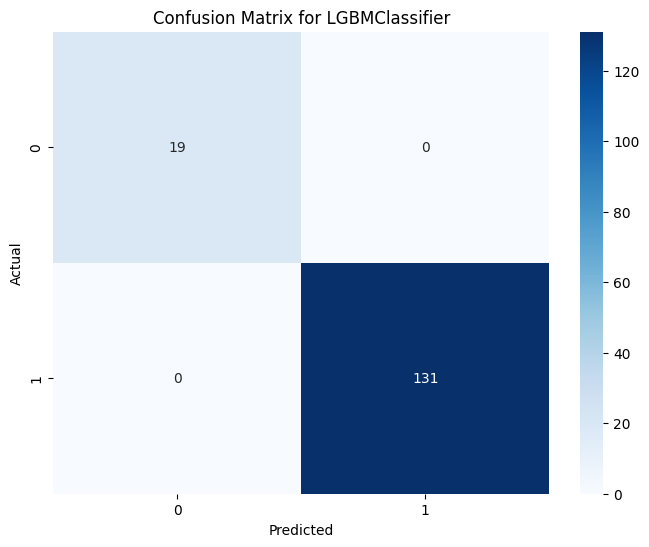

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Perform a randomized search for each model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nTuning {model_name}...")

    # Initialize a RandomizedSearchCV object
    rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)

    # Fit the RandomizedSearchCV object to the data
    rs.fit(X_train, y_train)

    # Print the best parameters and the best score
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best score: {rs.best_score_}")

    # Make predictions on the test set
    y_pred = rs.best_estimator_.predict(X_test)

    # Print the confusion matrix
    print(f"Confusion matrix for {model_name}:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print("\n")

    # Print the classification report
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")

    # Generate heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

- True Negatives (top-left): The value 40 represents the number of instances that were correctly predicted as negative (0).
- False Positives (top-right): The value 3 represents the number of instances that were incorrectly predicted as positive (1) when they were actually negative (0).
- False Negatives (bottom-left): The value 0 represents the number of instances that were incorrectly predicted as negative (0) when they were actually positive (1).
- True Positives (bottom-right): The value 111 represents the number of instances that were correctly predicted as positive (1).

- Based on this confusion matrix, we can calculate various performance metrics for the logistic regression model, such as:

- Accuracy: The overall accuracy of the model, calculated as (True - Positives + True Negatives) / Total instances.
- Precision: The proportion of positive predictions that were actually correct, calculated as True Positives / (True Positives + False Positives).
- Recall (Sensitivity): The proportion of actual positive instances that were correctly identified, calculated as True Positives / (True Positives + False Negatives).
- Specificity: The proportion of actual negative instances that were correctly identified, calculated as True Negatives / (True Negatives + False Positives).

>The logistic regression model, random forest, gradient boosting, and light GBM classifiers performed exceptionally well, achieving perfect or near-perfect accuracy in predicting student churn.


-The confusion matrices for these models show high true positive and true negative rates, indicating accurate predictions for both churn and non-churn cases.


-The other models, such as K-nearest neighbors, support vector machines, and the MLP classifier, had slightly lower accuracy but still performed reasonably well.
-For example, the logistic regression model had a precision of 0.99 and a recall of 0.96 for predicting churn. This means that out of all the instances it predicted as churn, 99% were actually churn, and it correctly identified 96% of the actual churn instances.


-The random forest, gradient boosting, and light GBM classifiers achieved perfect precision and recall, indicating their ability to accurately identify both churn and non-churn cases.

In [155]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Distribution of numerical features
# data.hist(figsize=(10, 10))
# plt.show()

# # Correlation heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
# plt.show()


In [156]:
# plt.figure(figsize=(20, 10))

# sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')


***